This file is used  to visualize the variant selection results of k562_bt142 data.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vireoSNP
from utilities import *
import re

## Read data

In [2]:
## read p-value data
folder_path = "/home/linxy29/data/maester/maester_paper/k562_bt142/variant_selection/fixed_effect/"
res_name = "trimmed_starsolo_chrM_cellSNP0"
res = pd.read_csv(folder_path + res_name + "_res.csv", index_col=0)
print("The dimension of the p-value data is: ", res.shape)
print(res.head())

The dimension of the p-value data is:  (12666, 4)
        Wald_pval    LR_val  LRT_pval   LRT_fdr
681T>N   0.478269  0.496936  0.779995  1.000000
682A>C   0.108487  2.690036  0.260535  0.744724
683G>T   0.007620 -4.162745  1.000000  1.000000
684T>A   0.574830  0.294555  0.863054  1.000000
685A>C   0.070326 -0.848597  1.000000  1.000000


!We need to subset cells that are used for variants selection and use their infromation for further testing? - Yes

In [3]:
## read variant data
k562bt142_mquad, k562bt142_barcode = load_cellsnp("/home/linxy29/data/maester/maester_paper/k562_bt142/maester/" + res_name + "/")
print("The dimension of the AD data is: ", k562bt142_mquad.ad.shape)
print("The dimension of the DP data is: ", k562bt142_mquad.dp.shape)
print("The number of mtSNPs is: ", len(k562bt142_mquad.variants))

Loaded VCF file: /home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0/cellSNP.cells.vcf.gz
16569 variants detected
variant names detected
The dimension of the AD data is:  (16569, 6196)
The dimension of the DP data is:  (16569, 6196)
The number of mtSNPs is:  16569


In [4]:
# Read paper variants
paper_variant_file = '/home/linxy29/data/maester/maester_paper/k562_bt142/variant_selection/paper_variant.txt'

# Read the paper variants into a set for efficient lookups
with open(paper_variant_file, 'r') as file:
    paper_variants = set(file.read().splitlines())

print("The first 10 paper variants are: ", list(paper_variants)[:10])
print("The number of paper variants is: ", len(paper_variants))

The first 10 paper variants are:  ['1888G>A', '1420T>C', '7990C>T', '2141T>C', '9117T>C', '709G>A']
The number of paper variants is:  6


In [5]:
# Read clone ID
clonID = pd.read_csv("/home/linxy29/data/maester/maester_paper/k562_bt142/cell_label.csv")
print("The dimension of the clone ID data is: ", clonID.shape)
print(clonID.head())

The dimension of the clone ID data is:  (2666, 2)
            barcode true_label
0  ATGAGGGCAATAGTCC       K562
1  AGTACTGGTCAACCAT       K562
2  CATCCACCAGTGTGCC       K562
3  TATACCTAGTCCCTAA       K562
4  TCCGATCGTGCAACGA       K562


## Plot
We can plot 1) p-values and allele frequencies of variants defined in the original paper; Plot 2) Description of p-values; Plot 3) variants with low p-values

Let's start with plot 1.

In [6]:
## change the variant names to the format of the paper
k562bt142_mquad.variants = [f"{parts[1]}{parts[2]}>{parts[3]}" for parts in (variant.split('_') for variant in k562bt142_mquad.variants)]
print("The first 10 variants are: ", k562bt142_mquad.variants[:10])

The first 10 variants are:  ['1G>A', '2A>C', '3T>A', '4C>G', '5A>C', '6C>G', '7A>C', '8G>T', '9G>A', '10T>C']


In [7]:
## check whether the mutation site are in the paper
paper_site = [int(re.match(r'\d+', item).group()) for item in paper_variants]
print("The first 10 mutation sites in paper are: ", paper_site[:10])
pval_site = [int(re.match(r'\d+', item).group()) for item in res.index]
print("The first 10 mutation sites in data are: ", pval_site[:10])
## get the index of the paper site in the data site
paper_pval_index = [pval_site.index(item) for item in paper_site]
print("The first 10 paper index are: ", paper_pval_index[:10])

The first 10 mutation sites in paper are:  [1888, 1420, 7990, 2141, 9117, 709]
The first 10 mutation sites in data are:  [681, 682, 683, 684, 685, 686, 687, 688, 689, 690]
The first 10 paper index are:  [1102, 735, 5825, 1355, 6654, 28]


The paper p-value are: 
          Wald_pval       LR_val  LRT_pval  LRT_fdr
1888A>G        0.0  8528.275374       0.0      0.0
1420C>T        0.0  5435.435911       0.0      0.0
7990C>T        0.0  8296.652841       0.0      0.0
2141C>T        0.0  8316.530659       0.0      0.0
9117C>T        0.0  5830.334159       0.0      0.0
709A>G         0.0  7388.948921       0.0      0.0


<AxesSubplot:>

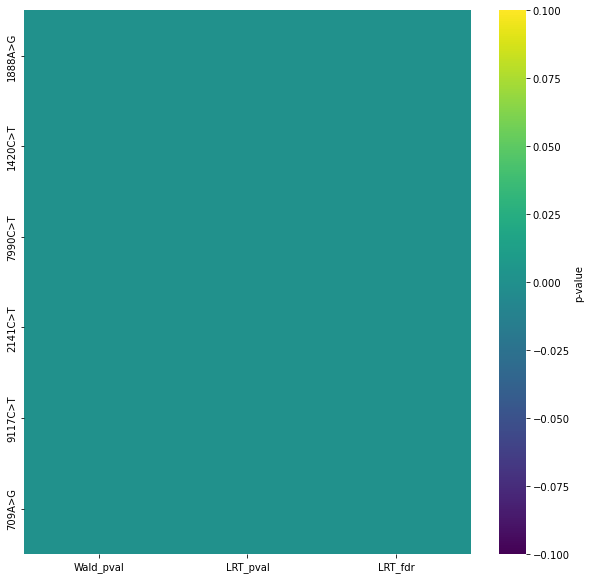

In [8]:
## get the p-value of the paper site
paper_pval = res.iloc[paper_pval_index]
print("The paper p-value are: \n", paper_pval.head(10))
## plot the p-value heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(paper_pval.drop('LR_val', axis=1), cmap='viridis', cbar_kws={'label': 'p-value'})

In [9]:
## get indices in mquad data
mquad_site = [int(re.match(r'\d+', item).group()) for item in k562bt142_mquad.variants]
print("The first 10 data sites are: ", mquad_site[:10])
## get the index of the paper site in the mquad site
paper_mquad_index = [mquad_site.index(item) for item in paper_site]
print("The first 10 paper index are: ", paper_mquad_index[:10])
## get the cell index that have cell line information
include_cell_index = [index for index in range(len(k562bt142_barcode)) if k562bt142_barcode[index] in clonID['barcode'].values]
include_cell_barcode = [k562bt142_barcode[index] for index in include_cell_index]
print("The number of cell line cells are: ", len(include_cell_index))

The first 10 data sites are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The first 10 paper index are:  [1887, 1419, 7989, 2140, 9116, 708]
The number of cell line cells are:  2655


In [11]:
true_variants_mquad, true_variants_barcode = select_mquad(k562bt142_mquad, k562bt142_barcode, include_indices= paper_mquad_index, include_cell=include_cell_index)
print("The dimension of the AD data is: ", true_variants_mquad.ad.shape)
print("The dimension of the DP data is: ", true_variants_mquad.dp.shape)
print("The number of mtSNPs is: ", len(true_variants_mquad.variants))

The dimension of the AD data is:  (6, 2655)
The dimension of the DP data is:  (6, 2655)
The number of mtSNPs is:  6


In [14]:
true_variants_barcode

array(['AAACCCACAGCTACAT', 'AAACCCAGTGATCGTT', 'AAACCCATCCCTTGTG', ...,
       'TTTGGTTTCGCAACAT', 'TTTGTTGAGACCTTTG', 'TTTGTTGAGCTAGCCC'],
      dtype='<U16')

In [16]:
write_mquad(true_variants_mquad, true_variants_barcode, "/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_paperVariantCell")
subsetCell_mquad, subsetCell_barcode = select_mquad(k562bt142_mquad, k562bt142_barcode, include_cell=include_cell_index)
write_mquad(subsetCell_mquad, subsetCell_barcode, "/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_paperCell")
print("The dimension of the AD data is: ", subsetCell_mquad.ad.shape)
print("The dimension of the DP data is: ", subsetCell_mquad.dp.shape)
print("The number of mtSNPs is: ", len(subsetCell_mquad.variants))

The dimension of the AD data is:  (16569, 2655)
The dimension of the DP data is:  (16569, 2655)
The number of mtSNPs is:  16569


In [17]:
clonID[clonID['barcode'].isin(include_cell_barcode)].to_csv("/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_paperCell/cell_label.csv", index=False)
clonID[clonID['barcode'].isin(include_cell_barcode)].to_csv("/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_paperVariantCell/cell_label.csv", index=False)

In [18]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

raw_col = cm.get_cmap('pink_r', 200)
new_colors = raw_col(np.linspace(0, 1, 256))
even_seg_pink = LinearSegmentedColormap.from_list("even_seg_pink", new_colors)
new_col = np.vstack((raw_col(np.linspace(0, 0.7, 10)),
                     raw_col(np.linspace(0.7, 1, 90))))
segpink = ListedColormap(new_col, name='segpink')

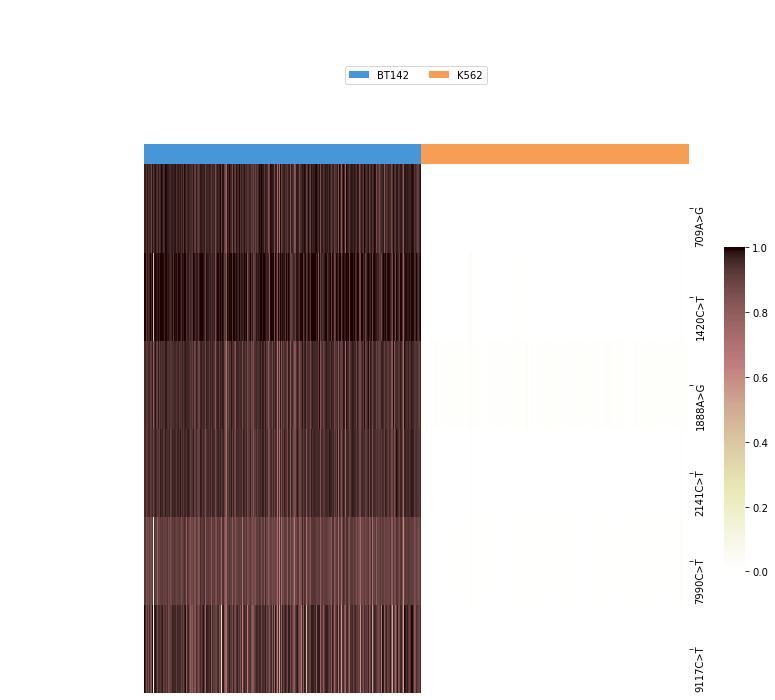

In [19]:
mtSNP_ids = true_variants_mquad.variants
cell_label = [clonID[clonID['barcode'] == barcode]['true_label'].values[0] for barcode in include_cell_barcode]
id_uniq = np.unique(cell_label)
vireoSNP.plot.anno_heat(true_variants_mquad.ad/true_variants_mquad.dp, col_anno=cell_label, col_order_ids=id_uniq,
                        cmap=even_seg_pink, yticklabels=mtSNP_ids)

Plot 2) Description of p-values

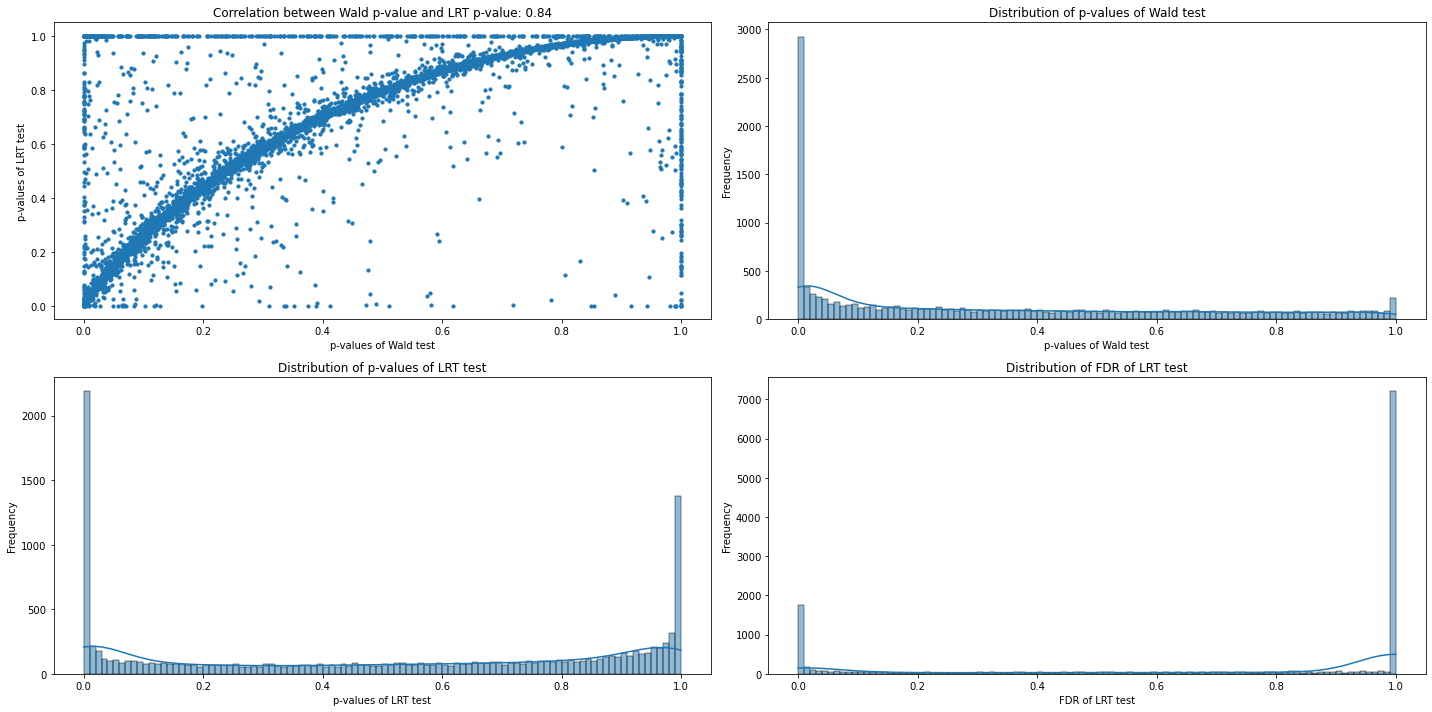

In [20]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the dot plot of the p-values in the first subplot
axes[0,0].scatter(res['Wald_pval'], res['LRT_pval'], s=10)  # Increased the size for better visibility
axes[0,0].set_xlabel('p-values of Wald test')
axes[0,0].set_ylabel('p-values of LRT test')
correlation = res['Wald_pval'].corr(res['LRT_pval'])
axes[0,0].set_title(f'Correlation between Wald p-value and LRT p-value: {correlation:.2f}')

# Plot the distribution of res['Wald_pval'] in the second subplot
sns.histplot(res['Wald_pval'], bins=100, kde=True, ax=axes[0,1])
axes[0,1].set_xlabel('p-values of Wald test')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of p-values of Wald test')

# Plot the distribution of res['LRT_pval'] in the third subplot
sns.histplot(res['LRT_pval'], bins=100, kde=True, ax=axes[1,0])
axes[1,0].set_xlabel('p-values of LRT test')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of p-values of LRT test')

# Plot the distribution of res['LR_fdr'] in the fourth subplot
sns.histplot(res['LRT_fdr'], bins=100, kde=True, ax=axes[1,1])
axes[1,1].set_xlabel('FDR of LRT test')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of FDR of LRT test')

# Show the plot
plt.tight_layout()
plt.show()

Plot 3) variants with low p-values

In [21]:
## get the variants where walde p-value is less than 0.05
sig_wald = res[res['Wald_pval'] < 0.05].index
print("The first 10 significant sites by Wald test are: ", sig_wald[:10])
print("The number of significant sites by Wald test is: ", len(sig_wald))

The first 10 significant sites by Wald test are:  Index(['683G>T', '686A>C', '687G>T', '689T>G', '692C>A', '703A>C', '705C>A',
       '708C>A', '709A>G', '710T>G'],
      dtype='object')
The number of significant sites by Wald test is:  3972


In [22]:
sig_wald_mquad_index = [k562bt142_mquad.variants.index(item) for item in sig_wald]
sig_wald_variants_mquad, sig_wald_variants_barcode = select_mquad(k562bt142_mquad, k562bt142_barcode, include_indices= sig_wald_mquad_index, include_cell=include_cell_index)
write_mquad(sig_wald_variants_mquad, sig_wald_variants_barcode, "/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_WaldVariant_paperCell")
print("The dimension of the AD data is: ", sig_wald_variants_mquad.ad.shape)
print("The dimension of the DP data is: ", sig_wald_variants_mquad.dp.shape)
print("The number of mtSNPs is: ", len(sig_wald_variants_mquad.variants))

The dimension of the AD data is:  (3972, 2655)
The dimension of the DP data is:  (3972, 2655)
The number of mtSNPs is:  3972


In [23]:
## select cloneID using include_cell_barcode
clonID[clonID['barcode'].isin(include_cell_barcode)].to_csv("/home/linxy29/data/maester/maester_paper/k562_bt142/maester/trimmed_starsolo_chrM_cellSNP0_WaldVariant_paperCell/cell_label.csv", index=False)

In [24]:
sig_wald = res[res['Wald_pval'] == 0].index
print("The first 10 significant sites by Wald test are: ", sig_wald[:10])
print("The number of significant sites by Wald test is: ", len(sig_wald))

The first 10 significant sites by Wald test are:  Index(['709A>G', '766G>T', '811G>A', '879T>G', '1108C>A', '1111C>A', '1113G>A',
       '1114T>A', '1119T>A', '1120C>A'],
      dtype='object')
The number of significant sites by Wald test is:  615


In [25]:
## calculate the allel frequency
af = np.divide(k562bt142_mquad.ad, k562bt142_mquad.dp, where=k562bt142_mquad.dp!=0)
af[np.isnan(af)] = 0
## get the mean of af
mean_af = np.mean(af, axis=1)
variance_af = np.var(af, axis=1)

In [26]:
## create dataframe with variant name, mean af and variance af
af_df = pd.DataFrame({'variant': k562bt142_mquad.variants, 'mean_af': mean_af, 'variance_af': variance_af})
res = res.reset_index()
res.columns = ['variant', 'Wald_pval', 'LRT_pval', 'LR_val', 'LRT_fdr']
print("The first 10 rows of the af data are: \n", res.head(10))

The first 10 rows of the af data are: 
   variant  Wald_pval   LRT_pval    LR_val   LRT_fdr
0  681T>N   0.478269   0.496936  0.779995  1.000000
1  682A>C   0.108487   2.690036  0.260535  0.744724
2  683G>T   0.007620  -4.162745  1.000000  1.000000
3  684T>A   0.574830   0.294555  0.863054  1.000000
4  685A>C   0.070326  -0.848597  1.000000  1.000000
5  686A>C   0.000568  11.452419  0.003259  0.021379
6  687G>T   0.013551   1.075361  0.584101  1.000000
7  688A>T   0.816885   0.600690  0.740563  1.000000
8  689T>G   0.002966   8.591541  0.013626  0.075630
9  690T>A   0.212892  -4.338309  1.000000  1.000000


In [27]:
## merge the af data with the p-value data
af_df = pd.merge(res, af_df, on='variant')
print("The first 10 rows of the merged data are: \n", af_df.head(10))

The first 10 rows of the merged data are: 
   variant  Wald_pval   LRT_pval    LR_val   LRT_fdr   mean_af   variance_af
0  681T>N   0.478269   0.496936  0.779995  1.000000  0.000012  4.481053e-08
1  682A>C   0.108487   2.690036  0.260535  0.744724  0.000192  7.217528e-07
2  683G>T   0.007620  -4.162745  1.000000  1.000000  0.000518  2.234718e-06
3  684T>A   0.574830   0.294555  0.863054  1.000000  0.000620  2.283361e-06
4  685A>C   0.070326  -0.848597  1.000000  1.000000  0.000431  1.841279e-06
5  686A>C   0.000568  11.452419  0.003259  0.021379  0.000634  2.537770e-06
6  687G>T   0.013551   1.075361  0.584101  1.000000  0.000335  1.167800e-06
7  688A>T   0.816885   0.600690  0.740563  1.000000  0.000413  2.658147e-06
8  689T>G   0.002966   8.591541  0.013626  0.075630  0.000828  3.670722e-06
9  690T>A   0.212892  -4.338309  1.000000  1.000000  0.000523  2.435934e-06


Text(0.5, 1.0, 'Wald p-value vs Variance of Allele Frequency')

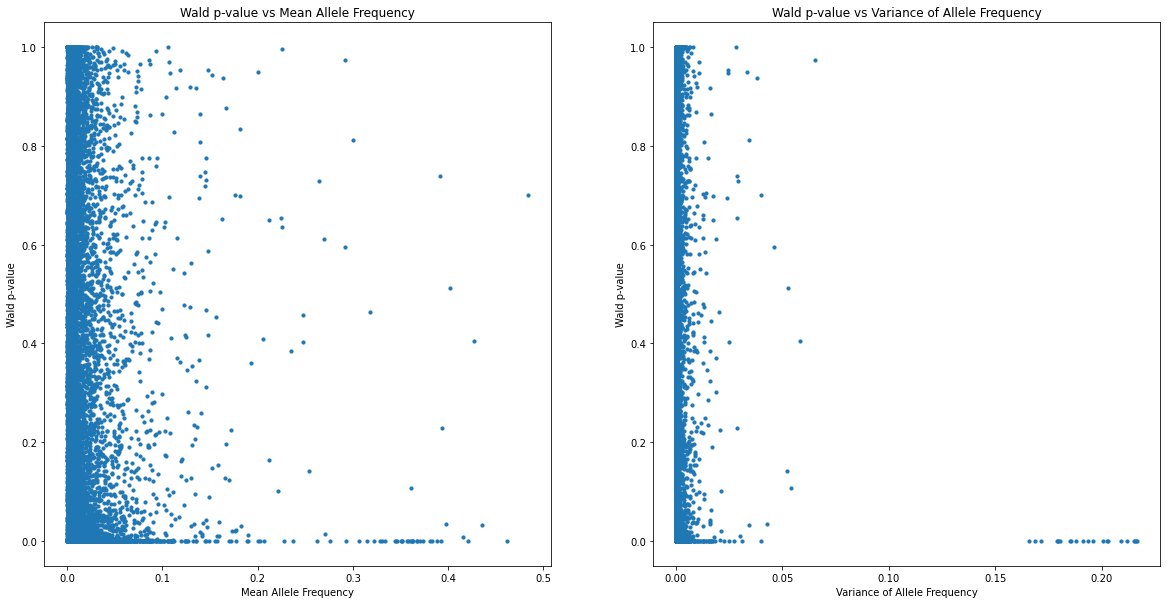

In [28]:
## plot wald p-value vs mean af and walde p-value vs variance af
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(af_df['mean_af'], af_df['Wald_pval'], s=10)
axes[0].set_xlabel('Mean Allele Frequency')
axes[0].set_ylabel('Wald p-value')
axes[0].set_title('Wald p-value vs Mean Allele Frequency')

axes[1].scatter(af_df['variance_af'], af_df['Wald_pval'], s=10)
axes[1].set_xlabel('Variance of Allele Frequency')
axes[1].set_ylabel('Wald p-value')
axes[1].set_title('Wald p-value vs Variance of Allele Frequency')

In [29]:
## randomly select 20 sites
import random
random.seed(42)
random_sig_wald = random.sample(list(sig_wald), 20)
## get the index of the paper site in the mquad site
random_sig_wald_mquad_index = [k562bt142_mquad.variants.index(item) for item in random_sig_wald]
print("The number of random significant sites by Wald test is: ", len(random_sig_wald))
## select cells and variants
random_sig_wald_variants_mquad = select_mquad(k562bt142_mquad, include_indices= random_sig_wald_mquad_index, include_cell=include_cell_index)
print("The dimension of the AD data is: ", random_sig_wald_variants_mquad.ad.shape)
print("The dimension of the DP data is: ", random_sig_wald_variants_mquad.dp.shape)
print("The number of mtSNPs is: ", len(random_sig_wald_variants_mquad.variants))

The number of random significant sites by Wald test is:  20


TypeError: select_mquad() missing 1 required positional argument: 'barcode'

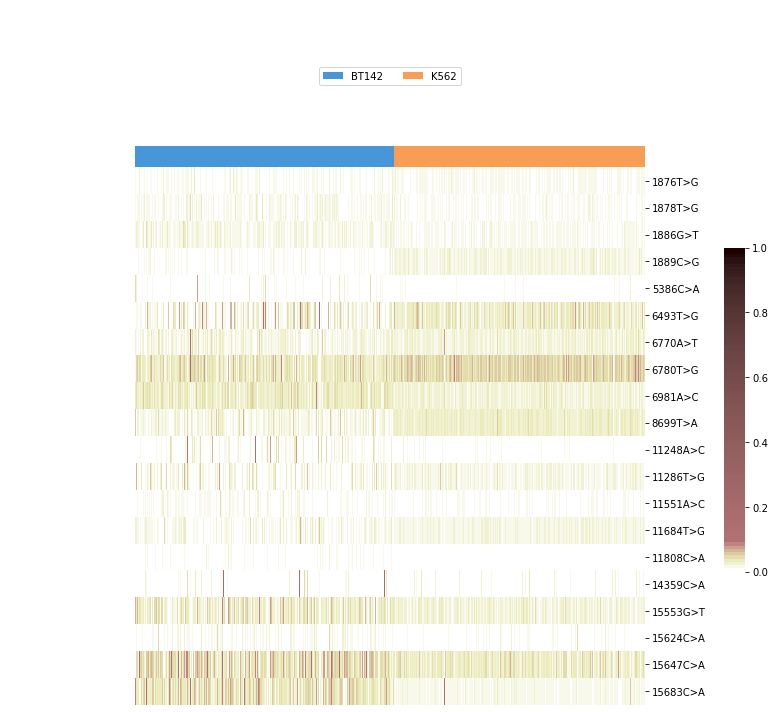

In [ ]:
data_array = np.divide(random_sig_wald_variants_mquad.ad, random_sig_wald_variants_mquad.dp, where=(random_sig_wald_variants_mquad.dp != 0))
data_array = np.nan_to_num(data_array)
## plot
mtSNP_ids = random_sig_wald_variants_mquad.variants
cell_label = [clonID[clonID['barcode'] == barcode]['true_label'].values[0] for barcode in include_cell_barcode]
id_uniq = np.unique(cell_label)
vireoSNP.plot.anno_heat(data_array, col_anno=cell_label, col_order_ids=id_uniq,
                        cmap=segpink, yticklabels=mtSNP_ids)